# introdução

Este trabalho busca obter uma rede neural para classificação dores lombares em normais ou anormais baseado em sintomas e caractericas fisiologicas utilizando o modelo de rede neural MLP.

A base de dados foi retirada daqui:

https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset?resource=download

Pra rede neural foi utilizada a biblioteca scikit-learn da linguagem python.




# Bibliotecas e Dados

A seguir estão as bibliotecas usadas durante todo o projeto.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve, validation_curve)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

from zipfile import ZipFile
import urllib.request
import requests
import shutil
import os

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

carregamos a nossa base de dados como um dataframe.

In [61]:
df = pd.read_csv(r'Dataset_spine.xls')

a seguir estão as colunas com os atributos. O atributo que desejamos prever é o 13 que classica uma pessoa como normal ou anormal baseada em seus dados de paramêtros da sua coluna cervical.

In [62]:
print(df)

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
305  47.903565  13.616688  36.000000  34.286877  117.449062  -4.245395   
306  53.936748  20.721496  29.220534  33.215251  114.365845  -0.421010   
307  61.446597  22.694968  46.170347  38.751628  125.670725  -2.707880   
308  45.252792   8.693157  41.583126  36.559635  118.545842   0.214750   
309  33.841641   5.073991  36.641233  28.767649  123.945244  -0.199249   

         Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0    0.744503  12.5661  14.5386  15.

abaixo estão as descrição de cada coluna

col1: pelvic_incidence

Col2: pelvic tilt

Col3: lumbar_lordosis_angle

Col4: sacral_slope

Col5: pelvic_radius

Col6: degree_spondylolisthesis

Col7: pelvic_slope

Col8: Direct_tilt

Col9: thoracic_slope

Col10: cervical_tilt

Col11: sacrum_angle

Col12: scoliosis_slope



In [63]:
df.rename(columns = {'Col1':'pelvic_incidence'}, inplace = True)
df.rename(columns = {'Col2':'pelvic tilt'}, inplace = True)
df.rename(columns = {'Col3':'lumbar_lordosis_angle'}, inplace = True)
df.rename(columns = {'Col4':'sacral_slope'}, inplace = True)
df.rename(columns = {'Col5':'pelvic_radius'}, inplace = True)
df.rename(columns = {'Col6':'degree_spondylolisthesis'}, inplace = True)
df.rename(columns = {'Col7':'pelvic_slope'}, inplace = True)
df.rename(columns = {'Col8':'Direct_tilt'}, inplace = True)
df.rename(columns = {'Col9':'thoracic_slope'}, inplace = True)
df.rename(columns = {'Col10':'cervical_tilt'}, inplace = True)
df.rename(columns = {'Col11':'sacrum_angle'}, inplace = True)
df.rename(columns = {'Col12':'scoliosis_slope'}, inplace = True)

precisamos converter o parametro 13 para um valor numérico.

In [64]:
class_att = list(df['Class_att'])
print(class_att)

['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Ab

In [65]:
for i in range(len(class_att)) :
  if class_att[i] == "Normal":
    class_att[i] = 0
  if class_att[i] == "Abnormal":
    class_att[i] = 1

print(class_att)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


adicionando a conversão para a o nosso data frame e dropando a antiga 'class_att'

In [69]:
df['Att'] = class_att
df.drop(df.columns[[12]], axis=1, inplace=True)
print(df)

     pelvic_incidence  pelvic tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991              36.641233     28.767649   

     pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0        98.672917      

# Analise dos Dados

## Correlação

Vamos analisar algumas caractéristicas da nossa base de dados. Primeiramente vamos ver a matriz de correlação.

In [70]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Att
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


Vemos que em geral os atributos apresentão uma baixa correlação. Os mais correlacionados são:

- col1: pelvic_incidence

- Col2: pelvic tilt

- Col3: lumbar_lordosis_angle

- Col4: sacral_slope

- Col5: pelvic_radius

- Col6: degree_spondylolisthesis

Para o nosso atributo alvo vemos que a maior correlação é entre degree_spondylolisthesis e a maior anticorrelação com pelvic_radius.

## distribuição

A seguir estão a distribuição de todos os atributos.

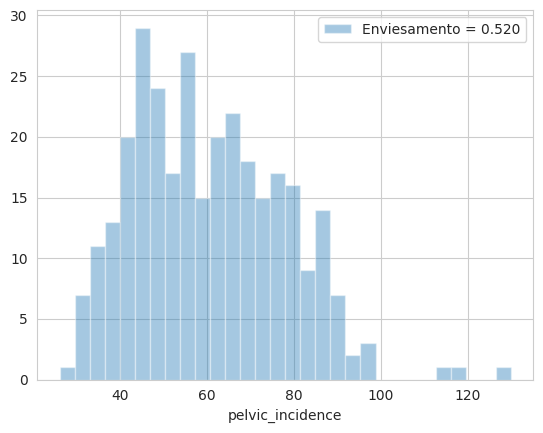

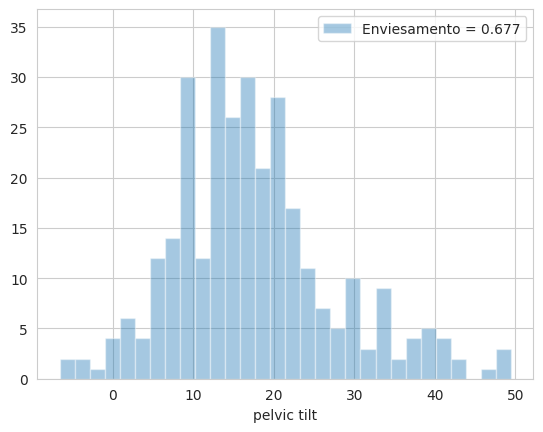

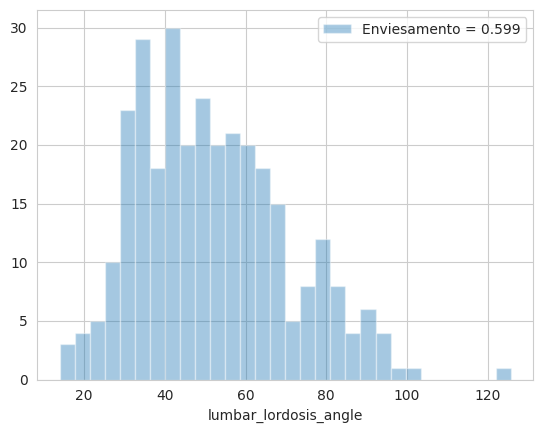

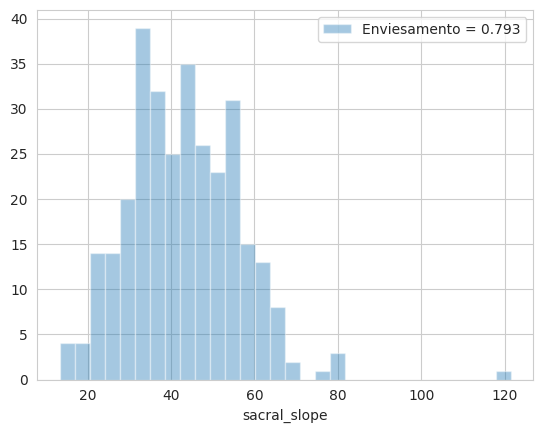

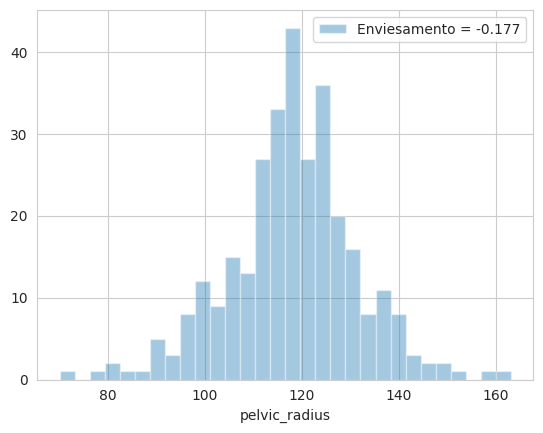

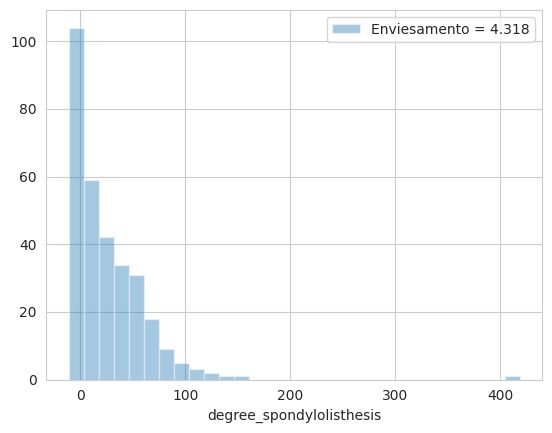

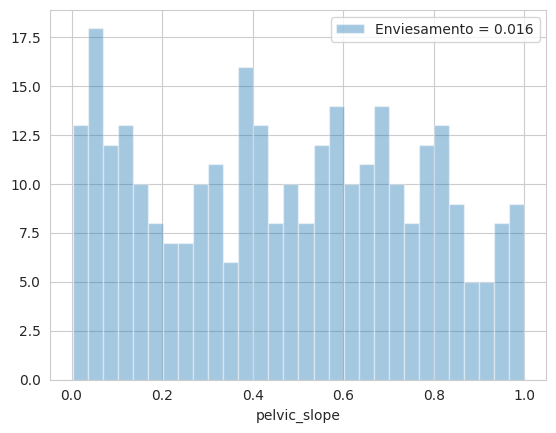

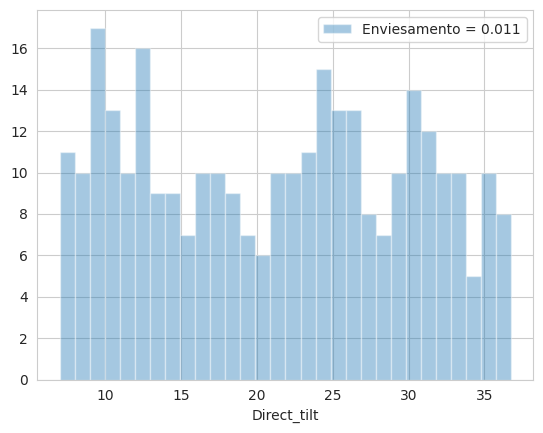

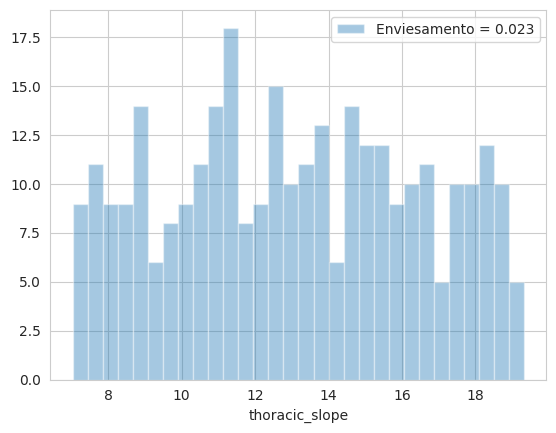

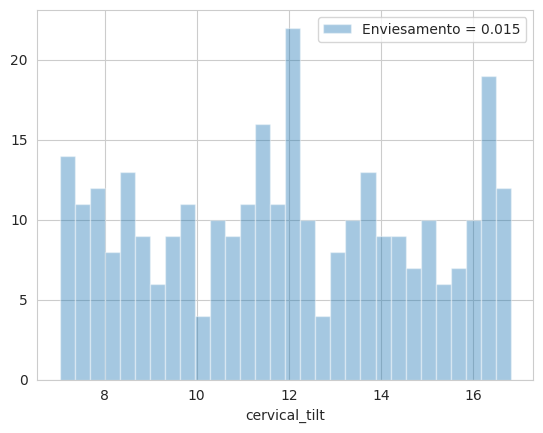

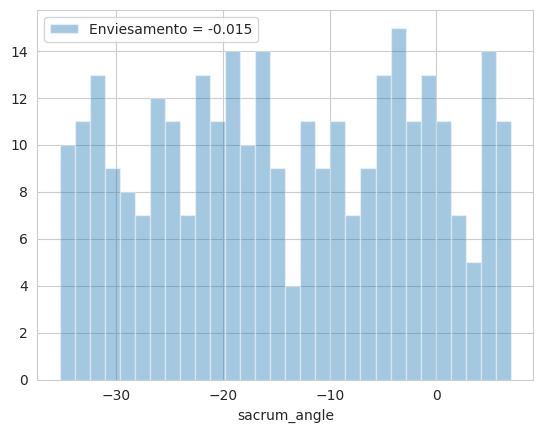

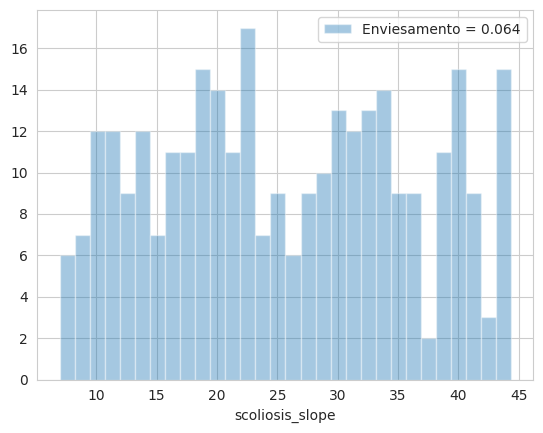

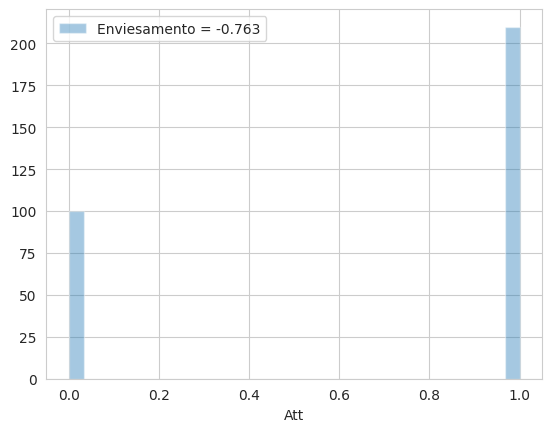

In [71]:
for feat in df.columns:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Enviesamento = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## box plots